In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

import logging

import torch

import importlib
import glob
import numpy as np
import plot_results as pltr
import F21DataLoader as dl
import f21_predict_base as base
import F21Stats as f21stats
import importlib

importlib.reload(dl)
importlib.reload(base)
importlib.reload(f21stats)
importlib.reload(pltr)

logger = logging.getLogger(__name__)

def load_dataset(datafiles, psbatchsize=1, ps_bins=None, limitsamplesize=None):
    # Create processor with desired number of worker threads
    processor = dl.F21DataLoader(max_workers=1, psbatchsize=psbatchsize, skip_ps=True, ps_bins=None, limitsamplesize=limitsamplesize)#, limitsamplesize=4)
        
    # Process all files and get results 
    results = processor.process_all_files(datafiles)
        
    # Access results
    #print(f'{results.keys()}')
    #all_ks = results['ks']
    all_los = results['los']
    all_freq = results['freq_axis']
    if limitsamplesize is not None: 
        all_los = all_los[:,:limitsamplesize]
        all_freq = all_freq[:,:limitsamplesize]
    #all_ps = results['ps']
    #ps_std = results['ps_std']
    #ps_plus_std = all_ps + ps_std
    #ps_minus_std = all_ps - ps_std
    #all_params = results['params']
    #plot_los(all_ps[0], freq_axis)
    """
    print(f"sample ks:{all_ks[0]}")
    print(f"sample ps:{all_ps[0,:]}")
    print(f"sample params:{all_params[0]}")
    print(f"sample los:{all_los[0]}")
    print(f"sample freq:{all_freq}")
    """
    #base.plot_los(all_los[:1], all_freq[0,:], showplots=True, saveplots = False, label=f"{all_params[0]}")
    #base.plot_power_spectra(all_ps[:1], all_ks[:1], all_params[:1], showplots=True, saveplots = False, label=f"{all_params[0]}")

    print(f"\nCombined data shape: {all_los.shape}")
    #print(f"Combined parameters shape: {all_params.shape}")
    return (all_los, all_freq)

shape:(20, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)


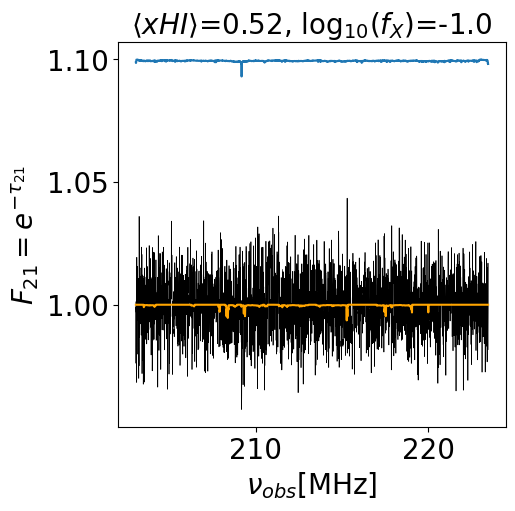

denoising $\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-1.0: χ²=0.35 χ²=0.00


In [38]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
print(f"shape:{los1052.shape}")
los1052so, freq_axis = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52*.dat"), limitsamplesize=2560)
print(f"shape:{los1052so.shape}")
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)
print(f"shape:{los1052noisy.shape}")
pltr.plot_denoised_los(los1052noisy[10:11], los1052so[10:11], los1052[10:11], showplots=True, saveplots=False, label=r'$\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-1.0', freq_axis=freq_axis[0]/1e6)

shape:(20, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)


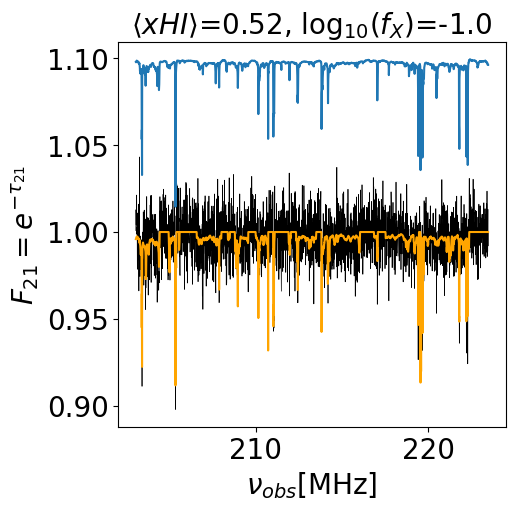

denoising $\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-1.0: χ²=0.36 χ²=0.03


In [39]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
print(f"shape:{los1052.shape}")
los1052so, freq_axis = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.52*.dat"), limitsamplesize=2560)
print(f"shape:{los1052so.shape}")
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.52_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)
print(f"shape:{los1052noisy.shape}")
pltr.plot_denoised_los(los1052noisy[10:11], los1052so[10:11], los1052[10:11], showplots=True, saveplots=False, label=r'$\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-1.0', freq_axis=freq_axis[0]/1e6)

shape:(20, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)


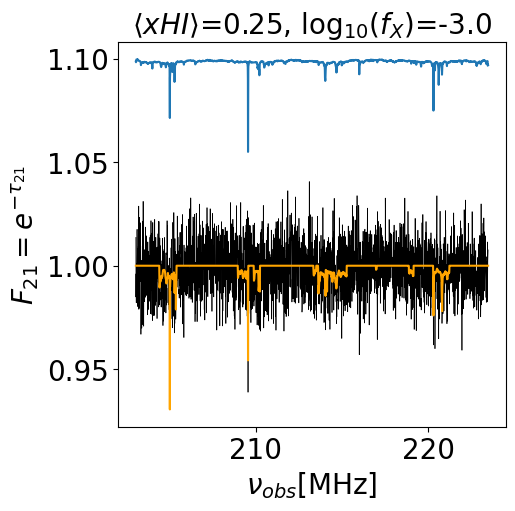

denoising $\langle xHI\rangle$=0.25, log$_{10}(f_X)$=-3.0: χ²=0.38 χ²=0.01


In [40]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.25_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
print(f"shape:{los1052.shape}")
los1052so, freq_axis = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.25*.dat"), limitsamplesize=2560)
print(f"shape:{los1052so.shape}")
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.25_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)
print(f"shape:{los1052noisy.shape}")
pltr.plot_denoised_los(los1052noisy[10:11], los1052so[10:11], los1052[10:11], showplots=True, saveplots=False, label=r'$\langle xHI\rangle$=0.25, log$_{10}(f_X)$=-3.0', freq_axis=freq_axis[0]/1e6)

shape:(20, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)


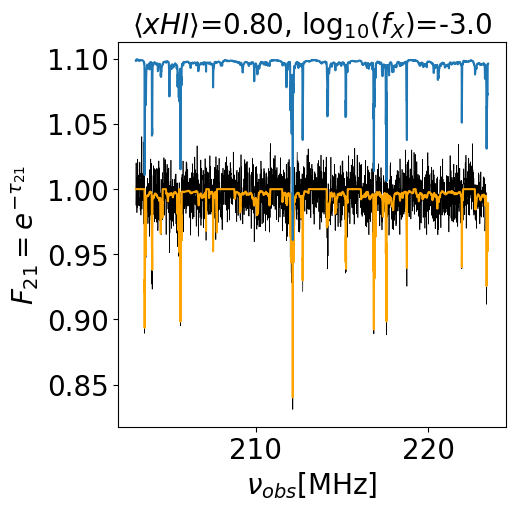

denoising $\langle xHI\rangle$=0.80, log$_{10}(f_X)$=-3.0: χ²=0.38 χ²=0.04


In [41]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.80_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
print(f"shape:{los1052.shape}")
los1052so, freq_axis = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.80*.dat"), limitsamplesize=2560)
print(f"shape:{los1052so.shape}")
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.80_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)
print(f"shape:{los1052noisy.shape}")
pltr.plot_denoised_los(los1052noisy[10:11], los1052so[10:11], los1052[10:11], showplots=True, saveplots=False, label=r'$\langle xHI\rangle$=0.80, log$_{10}(f_X)$=-3.0', freq_axis=freq_axis[0]/1e6)


Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)


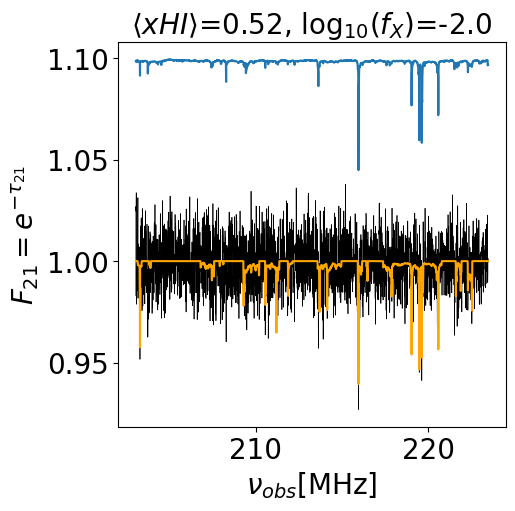

denoising $\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-2.0: χ²=0.37 χ²=0.02


In [42]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1052so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52*.dat"), limitsamplesize=2560)
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

pltr.plot_denoised_los(los1052noisy, los1052so, los1052, showplots=True, saveplots=True, label=r'$\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-2.0', freq_axis=freq_axis[0]/1e6)

In [58]:
def plot_los(los_test, samples=1, showplots=False, saveplots=True, label='', output_dir='tmp_out', freq_axis=None):
    
    for i, (noisy) in enumerate(los_test[:samples]):
        if freq_axis is None: freq_axis=range(len(noisy))
        
        plt.rcParams['figure.figsize'] = [5., 2.]
        plt.figure()

        #plt.title(f'{label}')
        #chisq_noisy = np.sum((noisy - test)**2 / test)
        plt.plot(freq_axis, noisy, c='black', linewidth=0.25)
        #plt.plot(freq_axis, test, label='Signal', c='orange')
        #chisq_denoised = np.sum((pred - test)**2 / test)
        #plt.plot(freq_axis, pred+0.1, label=f'Denoised+0.1: χ²={chisq_denoised:.2f}')
        #plt.xlabel(r'$\nu_{obs}$[MHz]'), 
        #plt.ylabel(r'$F_{21}=e^{-\tau_{21}}$')
        #plt.legend(loc='best')#lower right')
        plt.xticks(ticks=[])
        plt.yticks(ticks=[])
        
        if saveplots: 
            plt.savefig(f"{output_dir}/reconstructed_los_{label}.pdf", format="pdf", bbox_inches='tight')
            logger.info(f"Saved denoised los plot to {output_dir}/reconstructed_los_{label}.png")
        if i> 5: break
        if showplots: plt.show()
        #print(f'denoising {label}: χ²={chisq_noisy:.2f} χ²={chisq_denoised:.2f}')
        plt.close()


Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)


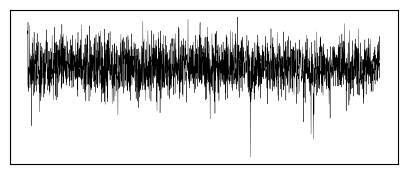

In [61]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1052so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52*.dat"), limitsamplesize=2560)
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

plot_los(los1052noisy, showplots=True, saveplots=True, label=r'$\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-2.0', freq_axis=freq_axis[0]/1e6)
#plot_los(los1052so, showplots=True, saveplots=True, label=r'$\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-2.0', freq_axis=freq_axis[0]/1e6)
#plot_los(los1052, showplots=True, saveplots=True, label=r'$\langle xHI\rangle$=0.52, log$_{10}(f_X)$=-2.0', freq_axis=freq_axis[0]/1e6)

In [89]:
import matplotlib.pyplot as plt
def plot_denoised_los_comb(los_test_set, y_test_so_set, y_pred_so_set, showplots=False, saveplots=True, labels=None, output_dir='tmp_out', freq_axis=None):
    #print(f'los_test_set.shape={los_test_set.shape}')
    base.initplt()
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    for i, (axs, noisy, test, pred, label) in enumerate(zip(axes, los_test_set, y_test_so_set, y_pred_so_set, labels)):
        print(f'noisy.shape={noisy.shape}')

        if freq_axis is None: freq_axis=range(len(noisy))
        axs.set_title(f'{label}')
             # Enable minor ticks
        axs.minorticks_on()

        # Customize major ticks
        axs.tick_params(
                which='major',
                direction='in',
                length=10,
                width=1,
                #labelsize=12,
                top=True,
                bottom=True,
                left=True,
                right=True
            )

        # Customize minor ticks
        axs.tick_params(
                which='minor',
                direction='in',
                length=5,
                width=1,
                top=True,
                bottom=True,
                left=True,
                right=True
            )
        chisq_noisy = np.sum((noisy - test)**2 / test)
        axs.plot(freq_axis, noisy, c='black', linewidth=0.5) #label=f'Signal+Noise: χ²={chisq_noisy:.2f}', 
        axs.plot(freq_axis, test, c='orange') #, label='Signal',
        chisq_denoised = np.sum((pred - test)**2 / test)
        axs.plot(freq_axis, pred+0.1) # label=f'Denoised+0.1: χ²={chisq_denoised:.2f}'
        axs.set_xlabel(r'$\nu_{obs}$[MHz]'), 
        #axs.set_ylabel(r'$F_{21}=e^{-\tau_{21}}$')
        #plt.legend(loc='best')#lower right')
        print(f'denoising {label}: χ²={chisq_noisy:.2f} χ²={chisq_denoised:.2f}')
    
    axes[1].set_xlabel(r'$\nu_{obs}$[MHz]')
    axes[0].set_ylabel(r'$F_{21}=e^{-\tau_{21}}$')
    fig.subplots_adjust(right=1, wspace=0, hspace=0)
    axes[1].legend(loc='lower center', title='log$_{10}(f_X)$=-2.0', title_fontsize=20)
    if saveplots: 
        plt.savefig(f"{output_dir}/reconstructed_los_{label}.pdf", format="pdf", bbox_inches='tight')
        logger.info(f"Saved denoised los plot to {output_dir}/reconstructed_los_{label}.png")


    if showplots: plt.show()
    plt.close()




Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)
los1080.shape=(20, 2560)

Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)
noisy.shape=(2560,)
denoising $\langle x_{HI}\rangle$=0.80: χ²=0.36 χ²=0.04
noisy.shape=(2560,)
denoising $\langle x_{HI}\rangle$=0.52: χ²=0.37 χ²=0.02
noisy.shape=(2560,)
denoising $\langle x_{HI}\rangle$=0.25: χ²=0.37 χ²=0.01


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_63997/583374383.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(loc='lower center', title='log$_{10}(f_X)$=-2.0', title_fontsize=20)


<Figure size 500x500 with 0 Axes>

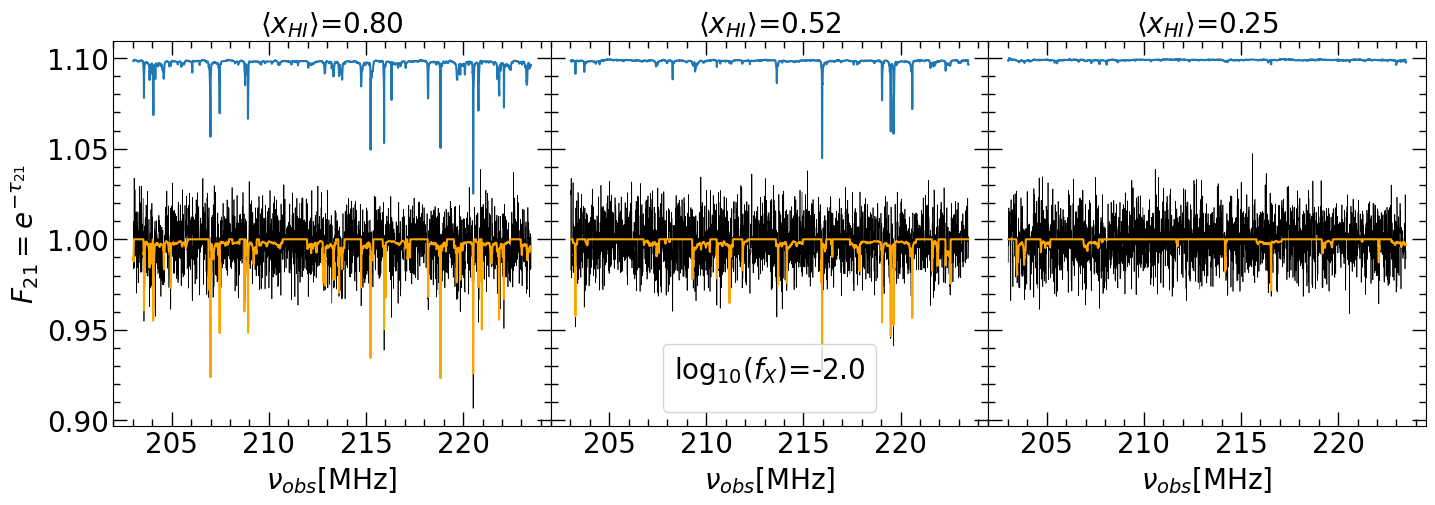

In [90]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1080 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.80_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1080so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.80*.dat"), limitsamplesize=2560)
los1080noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.80_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)
print(f'los1080.shape={los1080.shape}')
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1052so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52*.dat"), limitsamplesize=2560)
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

los1025 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1025so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25*.dat"), limitsamplesize=2560)
los1025noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)


plot_denoised_los_comb([los1080noisy[0], los1052noisy[0], los1025noisy[0]], [los1080so[0],los1052so[0],los1025so[0]], [los1080[0],los1052[0],los1025[0]], showplots=True, saveplots=True, labels=[r'$\langle x_{HI}\rangle$=0.80',r'$\langle x_{HI}\rangle$=0.52',r'$\langle x_{HI}\rangle$=0.25'], freq_axis=freq_axis[0]/1e6)


Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)


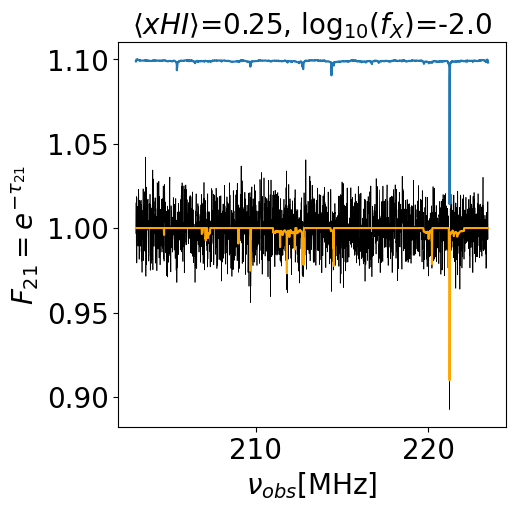

denoising $\langle xHI\rangle$=0.25, log$_{10}(f_X)$=-2.0: χ²=0.37 χ²=0.01


In [109]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1025 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1025so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25*.dat"), limitsamplesize=2560)
los1025noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

pltr.plot_denoised_los(los1025noisy[10:11], los1025so[10:11], los1025[10:11], showplots=True, saveplots=True, label=r'$\langle xHI\rangle$=0.25, log$_{10}(f_X)$=-2.0', freq_axis=freq_axis[0]/1e6)


Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)


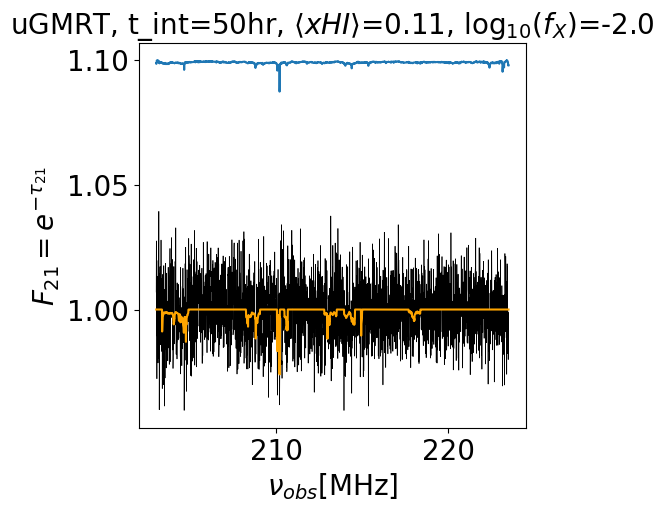

denoising uGMRT, t_int=50hr, $\langle xHI\rangle$=0.11, log$_{10}(f_X)$=-2.0: χ²=0.36 χ²=0.01


In [110]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1025 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1025so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11*.dat"), limitsamplesize=2560)
los1025noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

pltr.plot_denoised_los(los1025noisy[10:11], los1025so[10:11], los1025[10:11], showplots=True, saveplots=False, label=r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.11, log$_{10}(f_X)$=-2.0', freq_axis=freq_axis[0]/1e6)